## Pré-processamento é provavelmente a parte mais importante de ciência dos dados

Ter dados representativos sem atributos faltantes é provavelmente o pote de ouro em ciência dos dados. É muito incomum que os dados do mundo real não apresentem anomalias seja da própria natureza ou sejam anomalias introduzidas no processo de medição e registro da observação (amostra).

Esse notebook é voltado para como tratar dados mais complexos e transformar todas as informações em números que façam sentido para que o modelo seja capaz de traçar a relação entre atributos e classes. A seguir é oferecida uma pequena parcela de um conjunto de dados da empresa Porto Seguro, no qual uma competição foi aberta e os competidores foram desafiados a criar um modelo para prever se uma apólice teria um sinistro registrado ou não, indicando o uso do serviço.

Algumas características sobre o nome das features:
- O nome dos atributos indica o grupo ao qual pertence (ind, reg, car);
- Os prefixos bin e cat indicam atributos binários e categóricos, respectivamente;
- Atributos sem os prefixos citados podem ser ordinais ou contínuos;
- Atributos com -1 indicam dado faltante (missing); e
- A coluna 'target' indica se houve sinistro para apólice ou não.

In [1]:
import pandas as pd

df = pd.read_csv('porto.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [2]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,25202.952850,0.037350,1.900650,1.348800,4.418400,0.419450,0.411550,0.395650,0.255400,0.162500,...,5.454500,1.441200,2.878000,7.533850,0.124150,0.625000,0.555350,0.290900,0.359950,0.151500
std,14418.862026,0.189623,1.984308,0.653422,2.703037,0.493887,1.361054,0.489002,0.436097,0.368918,...,2.330043,1.205867,1.679035,2.743179,0.329761,0.484135,0.496939,0.454189,0.479997,0.358545
min,7.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12754.500000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25241.500000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,37675.500000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,50126.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,16.000000,8.000000,12.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Um cuidado especial que precisa ser tomado ao analisar um conjunto de dados é observar a distribuição dos atributos, por exemplo, pelo comando *describe()*. **Os valores estão em uma mesma escala? Será necessário normalizá-los?** Essas são perguntas quem você deverá se fazer ao trabalhar com os dados.

---

Em sequência, é importante verificar se existem registros duplicados. Registros duplicados em uma mesma classe não são relevantes para a maioria dos métodos, e podem economizar processamento quando removidos. **Já registros duplicados com classes diferentes podem confundir praticamente todos os métodos, é extremamente importante removê-los.**

In [3]:
print('Antes:', df.shape)
df.drop_duplicates()
print('Depois:', df.shape)

Antes: (20000, 59)
Depois: (20000, 59)


In [4]:
train = df[:18000]
test  = df[18000:]

display(train.describe())
display(test.describe())

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,22712.184167,0.037167,1.898222,1.346889,4.415667,0.420056,0.411111,0.396944,0.255111,0.162056,...,5.455889,1.444056,2.885389,7.542611,0.123111,0.624444,0.553056,0.292000,0.359500,0.152444
std,12989.716773,0.189175,1.984544,0.650745,2.698428,0.494031,1.360466,0.489278,0.435936,0.368512,...,2.326781,1.209709,1.680135,2.745146,0.328574,0.484279,0.497191,0.454695,0.479867,0.359461
min,7.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11543.500000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22719.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,33978.250000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,45135.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,16.000000,8.000000,11.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.00000
mean,47619.871000,0.039000,1.922500,1.366000,4.443000,0.414000,0.415500,0.38400,0.258000,0.166500,...,5.44200,1.415500,2.81150,7.455000,0.133500,0.630000,0.576000,0.2810,0.364000,0.14300
std,1438.407773,0.193643,1.982539,0.676959,2.744725,0.492672,1.366672,0.48648,0.437643,0.372622,...,2.35975,1.170703,1.66804,2.724828,0.340199,0.482925,0.494314,0.4496,0.481269,0.35016
min,45137.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000
25%,46366.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,4.00000,1.000000,2.00000,6.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000
50%,47608.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,5.00000,1.000000,3.00000,7.000000,0.000000,1.000000,1.000000,0.0000,0.000000,0.00000
75%,48839.250000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.00000,1.000000,0.000000,...,7.00000,2.000000,4.00000,9.000000,0.000000,1.000000,1.000000,1.0000,1.000000,0.00000
max,50126.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.00000,1.000000,1.000000,...,15.00000,7.000000,12.00000,22.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000


Ao trabalhar com as colunas (atributos), é interessante ter uma organização de que tipo de dado determinado atributo é, e para quais propósitos determinado atributo pode ser usado. Nesse sentido, seguindo o trabalho de https://www.kaggle.com/bertcarremans/data-preparation-exploration, vamos criar metadados para esse conjunto.

In [5]:
data = []
for f in train.columns:
    # definindo o uso (entre rótulo, id e atributos)
    if f == 'target':
        role = 'target' # rótulo
    elif f == 'id':
        role = 'id'
    else:
        role = 'input' # atributos
         
    # definindo o tipo do dado
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # mantem keep como verdadeiro pra tudo, exceto id
    keep = True
    if f == 'id':
        keep = False
    
    # cria o tipo de dado
    dtype = train[f].dtype
    
    # cria dicionário de metadados
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

Para visualizar o atributo e todos seus metadados, basta mostrar a variável meta:

In [6]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


Com essa estrutura de metadados, fica fácil consultar quais colunas quer se manter e que são nominais, por exemplo:

In [7]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

Da mesma forma, seria possível contar os atributos por tipo de uso e dado:

In [8]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Valores faltantes

Conforme já mencionado, os valores faltantes são indicados por -1, então é importante saber quais colunas têm valores faltantes e em qual proporção.

In [9]:
atributos_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        atributos_missing.append(f)
        missings_perc = missings/df.shape[0]
        
        print('Atributo {} tem {} amostras ({:.2%}) com valores faltantes'.format(f, missings, missings_perc))
        
print('No total, há {} atributos com valores faltantes'.format(len(atributos_missing)))

Atributo ps_ind_02_cat tem 6 amostras (0.03%) com valores faltantes
Atributo ps_ind_04_cat tem 4 amostras (0.02%) com valores faltantes
Atributo ps_ind_05_cat tem 163 amostras (0.81%) com valores faltantes
Atributo ps_reg_03 tem 3254 amostras (16.27%) com valores faltantes
Atributo ps_car_01_cat tem 3 amostras (0.01%) com valores faltantes
Atributo ps_car_03_cat tem 12400 amostras (62.00%) com valores faltantes
Atributo ps_car_05_cat tem 7980 amostras (39.90%) com valores faltantes
Atributo ps_car_07_cat tem 332 amostras (1.66%) com valores faltantes
Atributo ps_car_09_cat tem 26 amostras (0.13%) com valores faltantes
Atributo ps_car_14 tem 1287 amostras (6.44%) com valores faltantes
No total, há 10 atributos com valores faltantes


Duas estratégias podem ser optadas aqui: simplesmente remover o atributo ou tentar preenchê-lo de forma sintética. Preencher de forma sintética pode gerar uma falsa distribuição quando o número de atributos faltantes é muito alto. Quando este for o caso, é sempre seguro optar por remover o atributo inteiro. Também é importante lembrar que a estratégia de preenchimento deve ser coerente com o tipo de dado, por exemplo: **dados ordinais não devem ser preenchidos com média, nem dados contínuos com moda.**

In [10]:
# removendo ps_car_03_cat e ps_car_05_cat que tem muitos valores faltantes
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train = train.drop(vars_to_drop, axis=1)
test = test.drop(vars_to_drop, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # atualiza os metadados para ter como referência (processar o test depois)

In [11]:
from sklearn.preprocessing import Imputer

media_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
moda_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)

train['ps_reg_03'] = media_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = media_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = media_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = moda_imp.fit_transform(train[['ps_car_11']]).ravel()

test['ps_reg_03'] = media_imp.fit_transform(test[['ps_reg_03']]).ravel()
test['ps_car_12'] = media_imp.fit_transform(test[['ps_car_12']]).ravel()
test['ps_car_14'] = media_imp.fit_transform(test[['ps_car_14']]).ravel()
test['ps_car_11'] = moda_imp.fit_transform(test[['ps_car_11']]).ravel()

/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Os atributos categóricos podem ser mantidos porque o número de valores faltantes não é expressivo. Inclusive, a estratégia de preenchimento dos **atributos categóricos** é sempre mais complexa. Esses atributos **não se beneficiam de medidas estatísticas** como moda e média, portanto essas medidas não servem para preenchê-los de forma sintética.

---

## One-hot encoding (ou dummy variables)

Depois de ter tratado os dados faltantes, é importante que os dados ordinais tenham representação apropriada para o problema tratado. Se o dado não tem distância ou rankamento entre eles, cada valor de um atributo deve ser representado por um conjunto de atributos de mesma distância. *(Verificar slides desse encontro para que isso fique mais claro)*

Os dados que precisam ser separados em mais dimensões já foram identificados como nominais no pré-processamento. É importante verificar se esses dados têm grande variedade de valores ou não, e aplicar essa separação apenas se for viável. Por exemplo, se um determinado atributo tem 300 valores, isso geraria 300 colunas novas. Isso só se justificaria se fosse uma base realmente grande e se houvesse uma correlação muito alta entre essa variedade de valores e a classe.

In [12]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Atributo {} tem {} valores distintos'.format(f, dist_values))

Atributo ps_ind_02_cat tem 5 valores distintos
Atributo ps_ind_04_cat tem 3 valores distintos
Atributo ps_ind_05_cat tem 8 valores distintos
Atributo ps_car_01_cat tem 13 valores distintos
Atributo ps_car_02_cat tem 2 valores distintos
Atributo ps_car_04_cat tem 10 valores distintos
Atributo ps_car_06_cat tem 18 valores distintos
Atributo ps_car_07_cat tem 3 valores distintos
Atributo ps_car_08_cat tem 2 valores distintos
Atributo ps_car_09_cat tem 6 valores distintos
Atributo ps_car_10_cat tem 3 valores distintos
Atributo ps_car_11_cat tem 104 valores distintos


Vamos optar por manter todos atributos e, portanto, gerar o conjunto de atributos que os mantêm à mesma distância:

In [13]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Antes do one-hot encoding tinha-se {} atributos'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('Depois do one-hot encoding tem-se {} atributos'.format(train.shape[1]))

test = pd.get_dummies(test, columns=v, drop_first=True)
missing_cols = set( train.columns ) - set( test.columns )
for c in missing_cols:
    test[c] = 0
    
train, test = train.align(test, axis=1)

Antes do one-hot encoding tinha-se 57 atributos
Depois do one-hot encoding tem-se 210 atributos


## Depois de todo pré-processamento...

É hora de verificar se tanto treino como teste têm o mesmo tamanho/formato, e aplicar um modelo de classificação já que esse é um problema desse tipo. Vale lembrar que o tamanho do treino e teste pode variar quando você estiver participando de outras competições ou explorando outros conjuntos de dados.

Isso porque na maioria das competições não se tem o *target* do test. Estima-se uma resposta e submete ao Kaggle, por exemplo, para que ele verifique qual foi o resultado final. Então esse tamanho pode variar em 1 entre treino e teste. No nosso caso, como todos os dados vêm de uma mesma fonte para experimentos, é esperado que tenham a mesma quantidade de atributos ou colunas.

In [14]:
print(train.shape)
print(test.shape)

(18000, 210)
(2000, 210)


In [15]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

X_test  = test.drop(['id', 'target'], axis=1)
y_test  = test['target']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


0.961

---

# Exercício: Pre Processing TITANIC

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
titanic = pd.read_csv('titanic.data')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


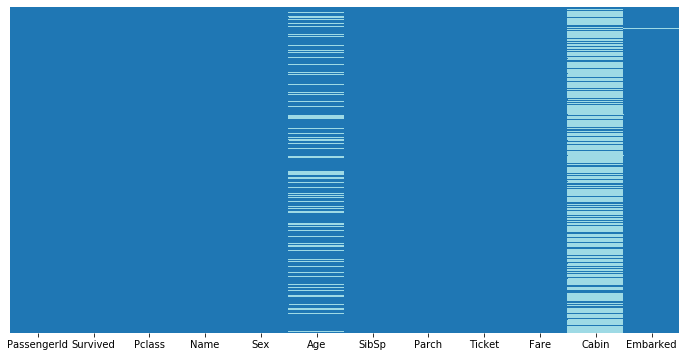

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='tab20')

In [113]:
data = []
for f in titanic.columns:
    # definindo o uso (entre rótulo, id e atributos)
    if f == 'Survived':
        role = 'target' # rótulo
    elif f == 'PassengerId':
        role = 'id'
    else:
        role = 'input' # atributos
         
    # definindo o tipo do dado
    if f == 'target':
        level = 'binary'
    elif titanic[f].dtype == float:
        level = 'interval'
    elif titanic[f].dtype == int:
        level = 'ordinal'
    else:
        level = 'nominal'
        
    # mantem keep como verdadeiro pra tudo, exceto id
    keep = True
    if f == 'Cabin' or f == 'Name' or f == 'Ticket':
        keep = False
    
    # cria o tipo de dado
    dtype = titanic[f].dtype
    
    # cria dicionário de metadados
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [114]:
meta

,role,level,keep,dtype
varname,,,,
PassengerId,id,ordinal,True,int64
Survived,target,ordinal,True,int64
Pclass,input,ordinal,True,int64
Name,input,nominal,False,object
Sex,input,nominal,True,object
Age,input,interval,True,float64
SibSp,input,ordinal,True,int64
Parch,input,ordinal,True,int64
Ticket,input,nominal,False,object


In [116]:
atributos_missing = []

for f in titanic.columns:
    missings = titanic[titanic[f].isnull()][f].shape[0]
    if missings > 0:
        atributos_missing.append(f)
        missings_perc = missings/titanic.shape[0]
        
        print('Atributo {} tem {} amostras ({:.2%}) com valores faltantes'.format(f, missings, missings_perc))
        
print('No total, há {} atributos com valores faltantes'.format(len(atributos_missing)))

Atributo Age tem 177 amostras (19.87%) com valores faltantes
Atributo Cabin tem 687 amostras (77.10%) com valores faltantes
Atributo Embarked tem 2 amostras (0.22%) com valores faltantes
No total, há 3 atributos com valores faltantes


In [117]:
titanic.groupby('Pclass').median()['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [118]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [119]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

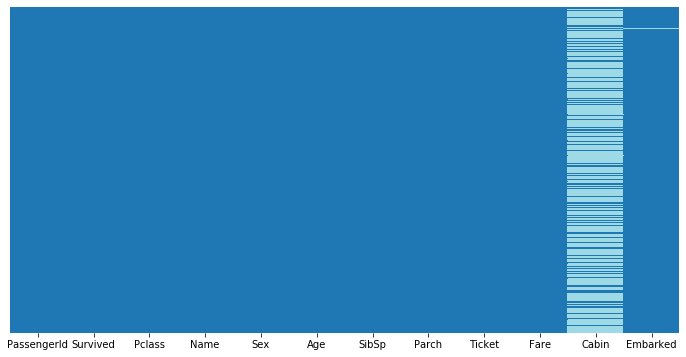

In [120]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='tab20')

In [121]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.dropna(inplace=True)

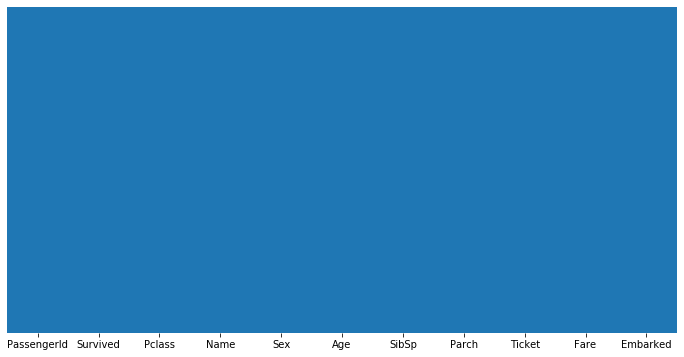

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='tab20')

In [123]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [124]:
meta

,role,level,keep,dtype
varname,,,,
PassengerId,id,ordinal,True,int64
Survived,target,ordinal,True,int64
Pclass,input,ordinal,True,int64
Name,input,nominal,False,object
Sex,input,nominal,True,object
Age,input,interval,True,float64
SibSp,input,ordinal,True,int64
Parch,input,ordinal,True,int64
Ticket,input,nominal,False,object


In [125]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Antes do one-hot encoding tinha-se {} atributos'.format(titanic.shape[1]))
titanic = pd.get_dummies(titanic, columns=v, drop_first=True)
print('Depois do one-hot encoding tem-se {} atributos'.format(titanic.shape[1]))

Antes do one-hot encoding tinha-se 11 atributos
Depois do one-hot encoding tem-se 12 atributos


In [129]:
titanic.drop(['Name','Ticket'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [131]:
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

## Utilizando Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train,y_train)

print(classification_report(y_test,model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



## Utilizando Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

print(classification_report(y_test,model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88       163
          1       0.85      0.75      0.80       104

avg / total       0.85      0.85      0.85       267

